# BACTERIA

In [15]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### ALPHA & BETA DIVERSITY
1. make a MAFFT tree
2. alpha rarefaction
3. alpha diversity
4. beta diversity

In [16]:
#import packages
import os
import dokdo
import qiime2 as q2
import seaborn as sns
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
from qiime2.plugins import phylogeny
from qiime2.plugins import diversity
from skbio import DistanceMatrix
import qiime2.plugins.phylogeny.actions as phylogeny_actions

In [17]:
# define workdir
%env WORKDIR /home/nezapa/qiime-thesis
WORKDIR = os.environ.get("WORKDIR")

env: WORKDIR=/home/nezapa/qiime-thesis


In [18]:
# import data
denoisetable_ba = q2.Artifact.load('./results/denoisetable_ba.qza')
rep_seqs_ba = q2.Artifact.load('./results/rep_seqs_ba.qza')
denoising_stats = q2.Artifact.load('./results/denoising_stats.qza')
sample_metadata = q2.Metadata.load('../00.sample-metadata.tsv')

## TREE

In [19]:
action_results = phylogeny_actions.align_to_tree_mafft_fasttree(
    sequences=rep_seqs_ba,
)
aligned_rep_seqs = action_results.alignment
masked_aligned_rep_seqs = action_results.masked_alignment
unrooted_tree = action_results.tree
rooted_tree = action_results.rooted_tree

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: mafft --preservecase --inputorder --thread 1 /tmp/qiime2-archive-9b2cu28r/b2bc4d77-2dc1-4f15-9e47-cc703aa65802/data/dna-sequences.fasta



inputfile = orig
416 x 260 - 260 d
nthread = 1
nthreadpair = 1
nthreadtb = 1
ppenalty_ex = 0
stacksize: 8192 kb
generating a scoring matrix for nucleotide (dist=200) ... done
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..
  401 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=0) ... 
  410 / 416
done.

Progressive alignment 1/2... 
STEP    42 / 415 (thread    0)
Reallocating..done. *alloclen = 1525
STEP   415 / 415 (thread    0) h
done.

Making a distance matrix from msa.. 
  400 / 416 (thread    0)
done.

Constructing a UPGMA tree (efffree=1) ... 
  410 / 416
done.

Progressive alignment 2/2... 
STEP   194 / 415 (thread    0)
Reallocating..done. *alloclen = 1521
STEP   415 / 415 (thread    0) h
done.

disttbfast (nuc) Version 7.505
alg=A, model=DNA200 (2), 1.53 (4.59), -0.00 (-0.00), noshift, amax=0.0
1 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto 

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: FastTree -quote -nt /tmp/qiime2-archive-ocudn0_v/0c42c8ce-287d-4147-a6d7-b17a494db66a/data/aligned-dna-sequences.fasta



FastTree Version 2.1.10 Double precision (No SSE3)
Alignment: /tmp/qiime2-archive-ocudn0_v/0c42c8ce-287d-4147-a6d7-b17a494db66a/data/aligned-dna-sequences.fasta
Nucleotide distances: Jukes-Cantor Joins: balanced Support: SH-like 1000
Search: Normal +NNI +SPR (2 rounds range 10) +ML-NNI opt-each=1
TopHits: 1.00*sqrtN close=default refresh=0.80
ML Model: Jukes-Cantor, CAT approximation with 20 rate categories
      0.14 seconds: Joined    100 of    400
      0.28 seconds: Joined    300 of    400
Initial topology in 0.35 seconds
Refining topology: 35 rounds ME-NNIs, 2 rounds ME-SPRs, 17 rounds ML-NNIs
      0.39 seconds: ME NNI round 2 of 35, 301 of 401 splits, 30 changes (max delta 0.133)
      0.54 seconds: SPR round   1 of   2, 101 of 804 nodes
      0.75 seconds: SPR round   1 of   2, 301 of 804 nodes
      0.87 seconds: SPR round   1 of   2, 401 of 804 nodes
      0.98 seconds: SPR round   1 of   2, 501 of 804 nodes
      1.10 seconds: SPR round   1 of   2, 601 of 804 nodes
      1.2

## ALPHA AND BETA DIVERSITY

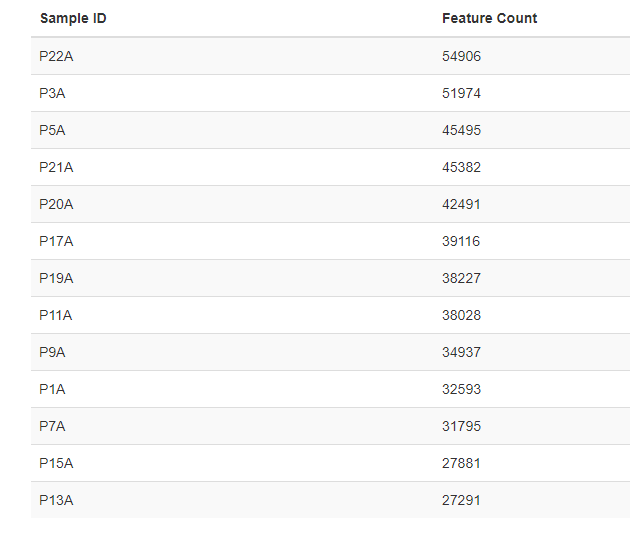

In [20]:
# # choose a round number in the 3rd quartile frequency per sample from the feature table visual summary
# # this step can take some time
# alpha_rarefaction_all = diversity.actions.alpha_rarefaction(
#     table = denoisetable_ba,
#     max_depth = 40000,
#     phylogeny = rooted_tree,
#     metrics = {'observed_features'},
#     metadata = sample_metadata,
#     steps = 1000
# )

In [21]:
# save alpha_rarefacion
# alpha_rarefaction_all.visualization.save('./results/alpha_rarefaction_40000.qzv')
qzv_file_alpha = q2.Visualization.load('./results/alpha_rarefaction_40000.qzv')

In [22]:
# sns.set()
# ax = dokdo.alpha_rarefaction_plot(qzv_file_alpha,
#                                   figsize=(9, 6),
#                                   metric='observed_features')
# ax.legend(ncol=5)
# plt.tight_layout()
# plt.savefig('./results/alpha_rarefaction_plot_ba.png')

In [23]:
qzv_file_alpha

<visualization: Visualization uuid: caaa43da-3fef-4226-9c91-3c3c5251f23d>

### ALPHA DIVERSITY

In [24]:
# set sampling_depth based on alpha rarefacation curve
# normalization step
depth = 27291
action_results = diversity.actions.core_metrics_phylogenetic(
    table = denoisetable_ba,
    phylogeny = rooted_tree,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.000550704212753035 and the largest is 1.402013633521036.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-h4om5xkd/3e59d0fa-0b7b-43b5-99ad-01525588a619/data/feature-table.biom -t /tmp/qiime2-archive-6uc081aw/358ae3d6-aef5-4416-b06b-032fcebf11e7/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-6putfib3

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-h4om5xkd/3e59d0fa-0b7b-43b5-99ad-01525588a619/data/feature-table.biom -t /tmp/qiime2-archive-6uc081aw/358ae3d6-aef5-4416-b06b-032fcebf11e7/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-ba13z1ux

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.002232869485970957 and the largest is 0.16230549915525358.


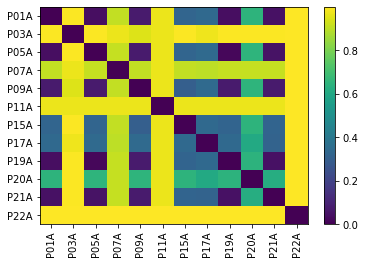

In [25]:
action_results.bray_curtis_distance_matrix.view(view_type=DistanceMatrix)

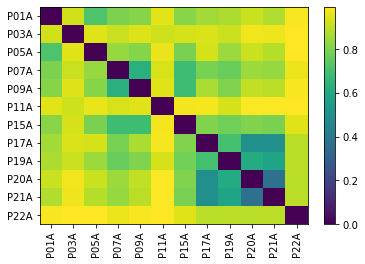

In [26]:
action_results.jaccard_distance_matrix.view(view_type=DistanceMatrix)

In [27]:
action_results.jaccard_emperor

<visualization: Visualization uuid: c74f5671-84f6-4645-b71d-92fd147ed36a>

In [28]:
# alpha_rarefaction = diversity.visualizers.alpha_rarefaction(
#    table = denoisetable_ba,
#    phylogeny = rooted_tree,
#    max_depth = depth,
#    metadata = sample_metadata,
#    metrics = {'chao1', 'shannon', 'simpson', 'simpson_e', 'observed_features', 'fisher_alpha'},
#    steps =  100
# )

# # save alpha_rarefacion
# alpha_rarefaction.visualization.save('./results/alpha_rar.qzv')

In [29]:
# load alpha_rarefacion
alpha_rar = q2.Visualization.load('./results/alpha_rar.qzv')
alpha_rar

<visualization: Visualization uuid: 84638aec-9c7e-43b5-80a9-86b5f83eba09>

In [30]:
metrics = ['observed_features', 'fisher_alpha', 'chao1', 'shannon', 'simpson', 'simpson_e']

# alpha diversity metrics and significance

# init empty list
df_list = []
artifacts = {}

# loop over metrics
for metric in metrics:
    result = diversity.actions.alpha(
        table = action_results.rarefied_table,
        metric = metric
    )  # save to result
    artifact = result.alpha_diversity  # extract artifact
    artifacts[metric] = artifact
    df_list.append(artifact.view(view_type=q2.Metadata).to_dataframe())  # convert to DF and add to list
    
df= pd.concat(df_list, axis=1)  # merge list of dataframes, add each DF as new column (instead of new row (default))
df

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson,simpson_e
Sample ID,,,,,,
P01A,31.0,3.454085,36.000000,0.336943,0.072778,0.034790
P03A,82.0,10.417748,82.000000,4.188011,0.877673,0.099693
P05A,19.0,1.995016,19.000000,0.118381,0.022697,0.053854
P07A,52.0,6.197573,53.200000,2.278674,0.709105,0.066109
P09A,26.0,2.834550,30.200000,0.482584,0.136128,0.044522
P11A,91.0,11.739195,92.500000,5.278426,0.956700,0.253786
P15A,40.0,4.604325,43.111111,1.495236,0.498880,0.049888
P17A,120.0,16.143365,120.750000,2.732793,0.562109,0.019031
P19A,48.0,5.659599,51.437500,0.177557,0.032496,0.021533


<AxesSubplot:xlabel='index', ylabel='observed_features'>

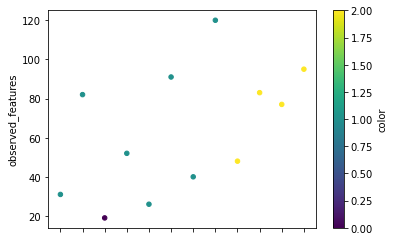

In [31]:
ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)
ndf["color"] = ndf.groupby("population").ngroup()
ndf.reset_index().plot.scatter("index", "observed_features", c="color", cmap=plt.cm.viridis)

In [32]:
ndf.head()

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson,simpson_e,sample,location,origin,year,parkelj,specimen,population,color
P01A,31.0,3.454085,36.0,0.336943,0.072778,0.034790,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,linija reke Ljubljanice,1
P03A,82.0,10.417748,82.0,4.188011,0.877673,0.099693,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,linija reke Ljubljanice,1
P05A,19.0,1.995016,19.0,0.118381,0.022697,0.053854,P05A,Stobe,Paa204_t10d,2016,no,Paa204,dolenjska linija,0
P07A,52.0,6.197573,53.2,2.278674,0.709105,0.066109,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,linija reke Ljubljanice,1
P09A,26.0,2.834550,30.2,0.482584,0.136128,0.044522,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,linija reke Ljubljanice,1


In [33]:
col = 'observed_features'
meta_cols = ['year', 'population']
df1 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

col = 'chao1'
df2 = ndf[meta_cols + [col]].rename(columns={col: 'value'}).eval('type=@col')

df = pd.concat([df1, df2])
df

,year,population,value,type
P01A,2015,linija reke Ljubljanice,31.000000,observed_features
P03A,2015,linija reke Ljubljanice,82.000000,observed_features
P05A,2016,dolenjska linija,19.000000,observed_features
P07A,2017,linija reke Ljubljanice,52.000000,observed_features
P09A,2019,linija reke Ljubljanice,26.000000,observed_features
P11A,2018,linija reke Ljubljanice,91.000000,observed_features
P15A,2019,linija reke Ljubljanice,40.000000,observed_features
P17A,2019,linija reke Ljubljanice,120.000000,observed_features
P19A,2016,črna podvrsta,48.000000,observed_features
P20A,2016,črna podvrsta,83.000000,observed_features


/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_obs-feat_chao1.png


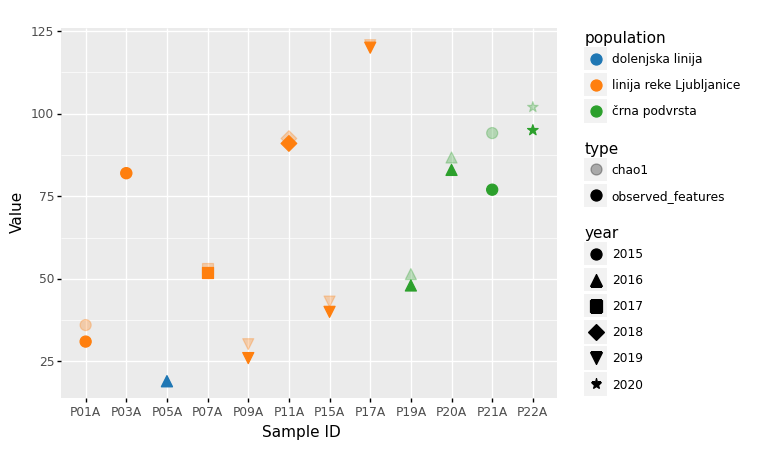

<ggplot: (8789201880601)>

In [34]:
from plotnine import *
from plotnine.data import *

p = (
    ggplot(df, aes(x=df.index, y='value', shape='year', color='population', alpha='type'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='Value')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + scale_alpha_manual([0.3, 1.0])
)

p.save('./results/bacteria_obs-feat_chao1.png')

p

In [35]:
#ndf = df.merge(sample_metadata.to_dataframe(), left_index=True, right_index=True)

# fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

# ax=axs[0]
# ax.scatter(ndf.index, ndf.observed_features, color="C"+ndf.groupby("population").ngroup().astype(str))
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)

# ax=axs[1]
# ax.scatter(ndf.index, ndf.shannon_entropy)
# ax.set_ylim([0, None])
# ax.tick_params(axis='x', labelrotation=90)


# plt.tight_layout()

In [36]:
ndf

,observed_features,fisher_alpha,chao1,shannon_entropy,simpson,simpson_e,sample,location,origin,year,parkelj,specimen,population,color
P01A,31.0,3.454085,36.000000,0.336943,0.072778,0.034790,P01A,Planinska_jama,Paa200_t0,2015,no,Paa200,linija reke Ljubljanice,1
P03A,82.0,10.417748,82.000000,4.188011,0.877673,0.099693,P03A,Planinska_jama,Paa201_t0,2015,no,Paa201,linija reke Ljubljanice,1
P05A,19.0,1.995016,19.000000,0.118381,0.022697,0.053854,P05A,Stobe,Paa204_t10d,2016,no,Paa204,dolenjska linija,0
P07A,52.0,6.197573,53.200000,2.278674,0.709105,0.066109,P07A,Planinska_jama,Paa209_t0,2017,no,Paa209,linija reke Ljubljanice,1
P09A,26.0,2.834550,30.200000,0.482584,0.136128,0.044522,P09A,Planinska_jama,Paa210_t0,2019,no,Paa210,linija reke Ljubljanice,1
P11A,91.0,11.739195,92.500000,5.278426,0.956700,0.253786,P11A,Planinska_jama,Paa211_t0,2018,no,Paa211,linija reke Ljubljanice,1
P15A,40.0,4.604325,43.111111,1.495236,0.498880,0.049888,P15A,Planinska_jama,Paa220_t0,2019,no,Paa220,linija reke Ljubljanice,1
P17A,120.0,16.143365,120.750000,2.732793,0.562109,0.019031,P17A,Planinska_jama,Paa221_t0,2019,no,Paa221,linija reke Ljubljanice,1
P19A,48.0,5.659599,51.437500,0.177557,0.032496,0.021533,P19A,Obrsec,PB271_parkelj,2016,yes,PB271,črna podvrsta,2
P20A,83.0,10.563422,86.750000,1.894325,0.606395,0.030610,P20A,Obrsec,PB272_parkelj,2016,yes,PB272,črna podvrsta,2


/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_shannon.png


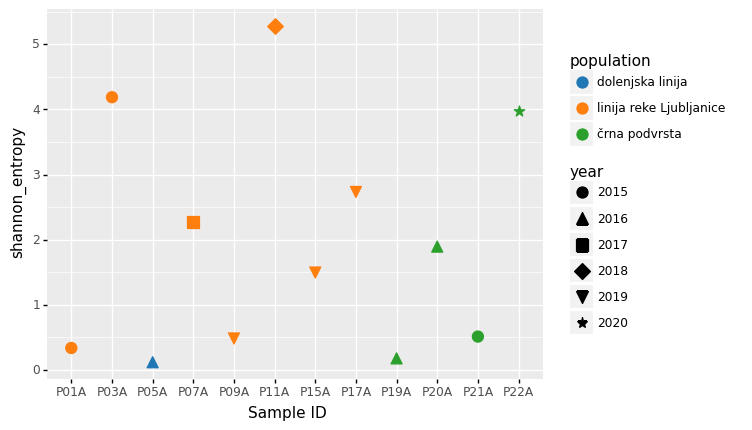

<ggplot: (8789201724284)>

In [37]:
shannon = (
    ggplot(ndf, aes(x=ndf.index, y='shannon_entropy', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='shannon_entropy')
    + scale_color_manual(['C0', 'C1', 'C2'])
)

shannon.save('./results/bacteria_shannon.png')
shannon

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ./results/bacteria_simpson_e.png


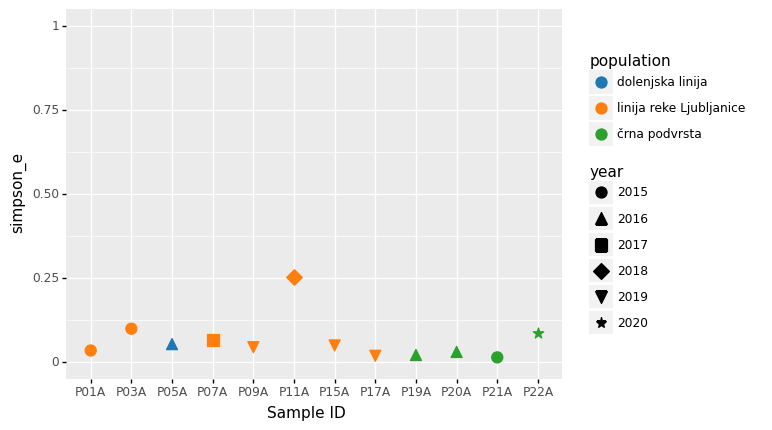

<ggplot: (8789201615975)>

In [38]:
simpson = (
    ggplot(ndf, aes(x=ndf.index, y='simpson_e', shape='year', color='population'))
    + geom_point(size=4)
    + labs(x='Sample ID', y='simpson_e')
    + scale_color_manual(['C0', 'C1', 'C2'])
    + ylim(0,1)
)

simpson.save('./results/bacteria_simpson_e.png')
simpson 

In [39]:
# visualisations of alpha diversity metrics
visualizations = {}

for key, value in artifacts.items():
    visualizations[key] = diversity.visualizers.alpha_group_significance(
        alpha_diversity = value,
        metadata = sample_metadata
    ).visualization

In [41]:
# # simpson viz
# visualizations['simpson_e']

# # simpson viz
# visualizations['simpson']

# # fisher_alpha viz
# visualizations['fisher_alpha']

# # evenness_vector viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.evenness_vector,
#     metadata = sample_metadata
# ).visualization

# # faith_pd viz
# diversity.visualizers.alpha_group_significance(
#     alpha_diversity = action_results.faith_pd_vector,
#     metadata = sample_metadata
# ).visualization

# # observed_features viz
# visualizations['observed_features']

# # chao1 viz
# visualizations['chao1']

# # shannon viz
# visualizations['shannon']

### BETA DIVERSITY

In [45]:
# make a subset, filter out dolenjska linija P05A
denoisetable_subset_population = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[population] IN ('linija reke Ljubljanice', 'črna podvrsta')"
)

In [46]:
# make a subset, filter out P07A (2017), P11A (2018), P22A (2020); leave 2015, 2016, 2019
denoisetable_subset_year = q2.plugins.feature_table.methods.filter_samples(
    table = denoisetable_ba,
    metadata = sample_metadata,
    where = "[year] IN ('2015', '2016', '2019')"
)

In [47]:
# determine depth/s from alpha_rarefaction
# determine conditions from metadata column names
depth = 27291
condition = 'population'

core_metrics_results_subset_population = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_population.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0006042003768698907 and the largest is 1.3181307781892693.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-0j3u8m2n/04a53bc9-b28f-48c1-98c1-46b56abbb785/data/feature-table.biom -t /tmp/qiime2-archive-6uc081aw/358ae3d6-aef5-4416-b06b-032fcebf11e7/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-2067zoqx

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-0j3u8m2n/04a53bc9-b28f-48c1-98c1-46b56abbb785/data/feature-table.biom -t /tmp/qiime2-archive-6uc081aw/358ae3d6-aef5-4416-b06b-032fcebf11e7/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-zzr6ekkj

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.002121237859284817 and the largest is 0.15336731484907123.


In [48]:
depth = 27291
condition = 'year'

core_metrics_results_subset_year = diversity.actions.core_metrics_phylogenetic(
    phylogeny = rooted_tree,
    table = denoisetable_subset_year.filtered_table,
    sampling_depth = depth,
    metadata = sample_metadata
)

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/sklearn/metrics/pairwise.py:1776: DataConversionWarning: Data was converted to boolean for metric jaccard
/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0002775288837630643 and the largest is 0.8357401856003228.


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /tmp/qiime2-archive-w18c6afk/9d0d1bcd-347b-47f0-8d30-d5decd9f0617/data/feature-table.biom -t /tmp/qiime2-archive-6uc081aw/358ae3d6-aef5-4416-b06b-032fcebf11e7/data/tree.nwk -o /tmp/q2-AlphaDiversityFormat-ezwg7njl

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

ssu -i /tmp/qiime2-archive-w18c6afk/9d0d1bcd-347b-47f0-8d30-d5decd9f0617/data/feature-table.biom -t /tmp/qiime2-archive-6uc081aw/358ae3d6-aef5-4416-b06b-032fcebf11e7/data/tree.nwk -m unweighted -o /tmp/q2-LSMatFormat-vgxxtc8l

Running external command line application. This may print messages to stdout and/

/opt/miniconda3/envs/qiime2-2022.2/lib/python3.8/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.0004411546680226223 and the largest is 0.10392128343957274.


#### PERMANOVA

In [49]:
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "permanova",
    pairwise = True
)
permanova_population.visualization
# statistično značilno skupine enake - potrjena nulta hpoteza

<visualization: Visualization uuid: 2c3191fa-cbea-4047-84ec-b6f5b1bb1d74>

<Figure size 432x288 with 0 Axes>

In [50]:
# PERMANOVA year
from qiime2.plugins.diversity.visualizers import beta_group_significance

permanova_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "permanova",
    pairwise = True
)
permanova_year.visualization

# ne moremo trdit da so si med leti enake

<visualization: Visualization uuid: e9ff07c1-5a5b-4eb0-aa1f-d7a2fa8917c6>

<Figure size 432x288 with 0 Axes>

#### PERMANOVA ADONIS

Thefunction partitions sums of squares of a multivariate data set, and is
directly analogous to MANOVA (multivariate analysis of variance). This
action differs from beta_group_significance in that it accepts R formulae
to perform multi-way ADONIS tests; beta_group_signficance only performs
one-way tests.

In [51]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population+year"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmp46hsssj0/dm.tsv /tmp/tmp46hsssj0/md.tsv population+year 999 1 /tmp/qiime2-temp-h29072ms/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: f5dfa05b-08cc-4949-9078-a9c151db3f4a>

In [52]:
adonis2 = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year+population"
)

adonis2.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpgmi9606f/dm.tsv /tmp/tmpgmi9606f/md.tsv year+population 999 1 /tmp/qiime2-temp-j2af9u53/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: 05174175-26d1-4ce7-b56a-f178db29c1a2>

In [53]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "population*year"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpcr4fyynk/dm.tsv /tmp/tmpcr4fyynk/md.tsv population*year 999 1 /tmp/qiime2-temp-gqi0c21k/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: b7caf7ed-ee28-47e9-8d31-07bee6bc8e3b>

In [54]:
adonis = q2.plugins.diversity.visualizers.adonis(
    distance_matrix = action_results.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata,
    formula =  "year*population"
)

adonis.visualization

Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command: run_adonis.R /tmp/tmpmpfyb5do/dm.tsv /tmp/tmpmpfyb5do/md.tsv year*population 999 1 /tmp/qiime2-temp-k1g15r6v/adonis.tsv

R version 4.1.3 (2022-03-10) 


Loading required package: permute
Loading required package: lattice
This is vegan 2.6-2
'adonis' will be deprecated: use 'adonis2' instead


<visualization: Visualization uuid: fef75cd0-3719-45a8-9b34-23ff9a5c22d7>

#### ANOSIM

In [55]:
anosim_population = beta_group_significance(
    distance_matrix = core_metrics_results_subset_population.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('population'),
    method = "anosim",
    pairwise = True
)
anosim_population.visualization

<visualization: Visualization uuid: 6cf8fb40-de81-4dfa-9c57-84f0f7c8e921>

<Figure size 432x288 with 0 Axes>

In [56]:
# anosim year

anosim_year = beta_group_significance(
    distance_matrix = core_metrics_results_subset_year.unweighted_unifrac_distance_matrix,
    metadata = sample_metadata.get_column('year'),
    method = "anosim",
    pairwise = True
)
anosim_year.visualization

<visualization: Visualization uuid: b86fca58-3f21-4df9-8658-c4040c2ea8b6>

<Figure size 432x288 with 0 Axes>